In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('data/train_motion_data.csv')
df_test=pd.read_csv('data/test_motion_data.csv')

In [3]:
df_train.tail()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791
3643,-0.402428,0.406218,-0.423009,-0.053603,-0.006720,0.001145,SLOW,3583791


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3084 non-null   float64
 1   AccY       3084 non-null   float64
 2   AccZ       3084 non-null   float64
 3   GyroX      3084 non-null   float64
 4   GyroY      3084 non-null   float64
 5   GyroZ      3084 non-null   float64
 6   Class      3084 non-null   object 
 7   Timestamp  3084 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 192.9+ KB


In [6]:
df_train.columns

Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class',
       'Timestamp'],
      dtype='object')

In [7]:
df_train['Class'].unique()

array(['NORMAL', 'AGGRESSIVE', 'SLOW'], dtype=object)

In [8]:
df_train['Class']=df_train['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 1, 1])
df_test['Class']=df_test['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 1, 1])

<Axes: xlabel='Class'>

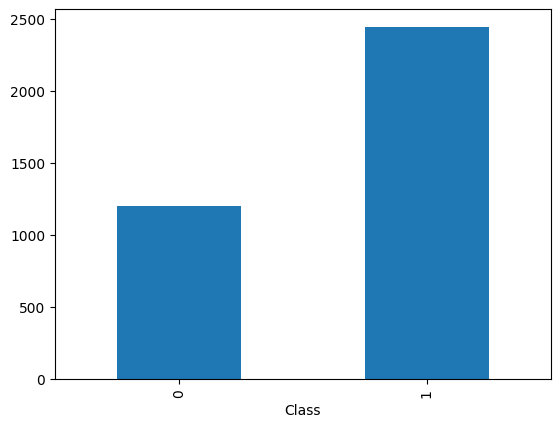

In [9]:
df_train.groupby('Class')['Class'].count().plot.bar()

In [10]:
from sklearn.utils import shuffle

df_train=df_train.drop('Timestamp',axis=1)
df_test=df_test.drop('Timestamp',axis=1)

df_train = shuffle(df_train, random_state=42)
df_test = shuffle(df_test, random_state=42)

In [11]:
from pycaret.classification import *
exp_class= setup(df_train, target = 'Class',session_id=1)

,Description,Value
0,Session id,1
1,Target,Class
2,Target type,Binary
3,Original data shape,"(3644, 7)"
4,Transformed data shape,"(3644, 7)"
5,Transformed train set shape,"(2550, 7)"
6,Transformed test set shape,"(1094, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [16]:
best_model = compare_models(errors="raise", exclude="lightgbm")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6706,0.5000,1.0000,0.6706,0.8028,0.0000,0.0000,0.0080
ridge,Ridge Classifier,0.6702,0.5119,0.9994,0.6705,0.8025,-0.0008,-0.0044,0.0100
lr,Logistic Regression,0.6698,0.5116,0.9988,0.6703,0.8023,-0.0016,-0.0062,0.0120
svm,SVM - Linear Kernel,0.6698,0.4939,0.9977,0.6706,0.8021,0.0000,-0.0016,0.0130
lda,Linear Discriminant Analysis,0.6698,0.5119,0.9988,0.6703,0.8023,-0.0016,-0.0062,0.0090
nb,Naive Bayes,0.6678,0.5265,0.9953,0.6698,0.8007,-0.0046,-0.0150,0.0090
qda,Quadratic Discriminant Analysis,0.6675,0.5203,0.9924,0.6702,0.8001,-0.0022,0.0008,0.0090
ada,Ada Boost Classifier,0.6580,0.5345,0.9474,0.6744,0.7879,0.0208,0.0343,0.0600
gbc,Gradient Boosting Classifier,0.6576,0.5429,0.9503,0.6735,0.7882,0.0154,0.0252,0.1450
et,Extra Trees Classifier,0.6525,0.5405,0.9222,0.6769,0.7806,0.0317,0.0434,0.0990


In [17]:
model = create_model(best_model)
final_model = finalize_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6706,0.5000,1.0000,0.6706,0.8028,0.0000,0.0000
1,0.6706,0.5000,1.0000,0.6706,0.8028,0.0000,0.0000
2,0.6706,0.5000,1.0000,0.6706,0.8028,0.0000,0.0000
3,0.6706,0.5000,1.0000,0.6706,0.8028,0.0000,0.0000
4,0.6706,0.5000,1.0000,0.6706,0.8028,0.0000,0.0000
5,0.6706,0.5000,1.0000,0.6706,0.8028,0.0000,0.0000
6,0.6706,0.5000,1.0000,0.6706,0.8028,0.0000,0.0000
7,0.6706,0.5000,1.0000,0.6706,0.8028,0.0000,0.0000
8,0.6706,0.5000,1.0000,0.6706,0.8028,0.0000,0.0000


In [19]:
unseen_predictions = predict_model(final_model, data=df_test)
unseen_predictions.tail(15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.6767,0.5000,1.0000,0.6767,0.8072,0.0000,0.0000


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,prediction_label,prediction_score
769,0.608875,0.389259,0.447627,-0.025045,-0.054749,0.024282,1,1,0.6707
1685,-0.841772,-1.178189,1.662983,0.010385,-0.055360,-0.045357,0,1,0.6707
130,-0.321260,-0.745316,2.173063,-0.059865,-0.147600,0.056658,1,1,0.6707
2919,-0.289367,-0.212890,0.575420,0.021380,0.021609,0.006567,1,1,0.6707
2135,-0.244667,-0.451853,-1.418913,0.033598,0.216475,-0.057574,1,1,0.6707
1482,0.429521,-0.191660,0.530755,0.050702,-0.035201,0.140957,0,1,0.6707
330,0.455627,-0.723790,1.255159,-0.136223,-0.162261,0.012065,1,1,0.6707
1238,1.469939,-0.194596,0.537172,0.035430,0.028329,-0.013592,0,1,0.6707
466,0.673169,-0.753416,0.197045,0.004276,0.091248,0.045662,1,1,0.6707
2169,0.737258,-0.615330,1.229405,-0.002443,-0.092012,-0.023366,1,1,0.6707


In [ ]:
# save_model(final_model, "driving-behavior-1")